# Cluster Analysis with the Iris dataset

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load and plot the data

In [75]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


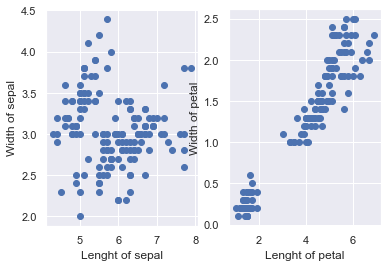

In [76]:
# Let's plot the data by the shape of their sepal
plt.subplot(1, 2, 1)
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

plt.subplot(1, 2, 2)
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')
plt.show()

# Clustering (unscaled data)

In [77]:
# We choose 2 clusters
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [78]:
clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

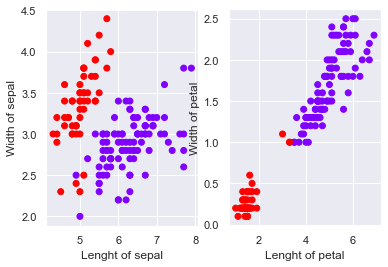

In [79]:
# plot the data by the shape of their sepal
plt.subplot(1, 2, 1)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

# plot the data by the shape of their petal
plt.subplot(1, 2, 2)
plt.scatter(clusters['petal_length'], clusters['petal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

plt.show()

# Clustering (scaled data)

#### Scale data

In [80]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

#### Clustering (scaled data)

In [81]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [82]:
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

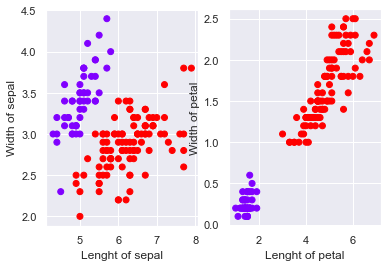

In [83]:
# plot the data by the shape of their sepal
plt.subplot(1, 2, 1)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

# plot the data by the shape of their petal
plt.subplot(1, 2, 2)
plt.scatter(clusters_scaled['petal_length'], clusters_scaled['petal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

plt.show()

# Elbow Method

#### WCSS

In [84]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

c:\Users\maria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0,
 223.73200573676348,
 140.96581663074699,
 114.36281520484569,
 91.02916928379733,
 81.53197201842737,
 71.98614546103886,
 63.209509543565126,
 54.62170288592348]

#### Elbow plot

Text(0, 0.5, 'Within-cluster Sum of Squares')

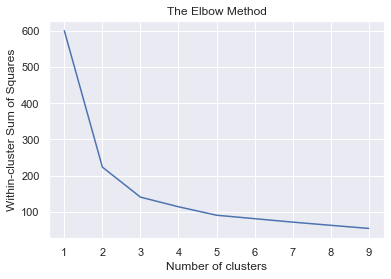

In [85]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

According to the elbow curve, 2, 3 or 5 clusters seem appropriate. Let's explore them

### 2 clusters

In [86]:
# Separate the scaled data into 2 clusters
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

Text(0, 0.5, 'Width of petal')

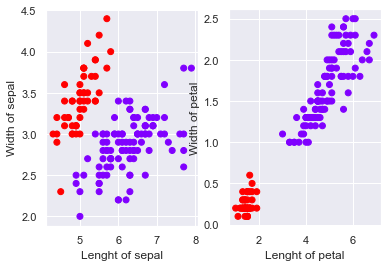

In [87]:
# Plot
plt.subplot(1, 2, 1)
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

plt.subplot(1, 2, 2)
plt.scatter(clusters_2['petal_length'], clusters_2['petal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

### 3 clusters

In [88]:
# Separate into 3 clusters
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

Text(0, 0.5, 'Width of petal')

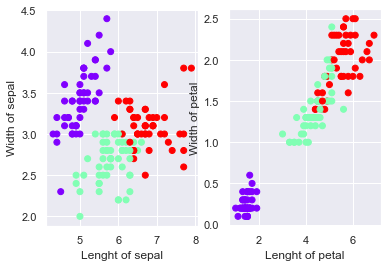

In [89]:
# Plot
plt.subplot(1, 2, 1)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

plt.subplot(1, 2, 2)
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

### 5 Clusters

In [90]:
# Separate into 5 clusters
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

Text(0, 0.5, 'Width of petal')

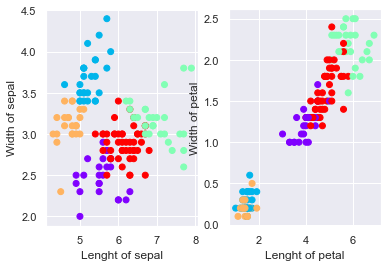

In [91]:
# plot
plt.subplot(1, 2, 1)
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

plt.subplot(1, 2, 2)
plt.scatter(clusters_5['petal_length'], clusters_5['petal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

# Compare our solutions to the original Iris dataset

#### Explore original dataset

In [92]:
# load data
real_data = pd.read_csv('iris_with_answers.csv')

# check how many species actually are
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [93]:
# Let's map the species
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


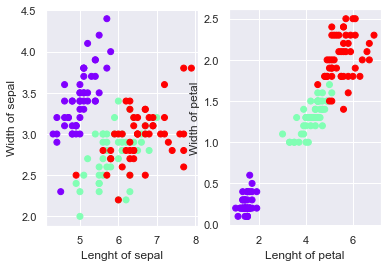

In [94]:
# Plot real data
# plot the data by the shape of their sepal
plt.subplot(1, 2, 1)
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')

# plot the data by the shape of their petal
plt.subplot(1, 2, 2)
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')

plt.show()

Conclusion: we can see that the features that actually make the species different are the petals, not the sepals. Also, the elbow method is not perfect, since we may have opted to choose 2 or even 4 clusters, when there are actually 3. 